# 基本信息


| 班级   | 姓名 | 学号 |
| :------- | ------ | ------ |
| SSSSSS | AA   | 2222 |
|        | BB   | 333  |

# 任务： 网络中心性的度量与解释（电视剧主演）

1. 构建“小组偏爱的演员网络”。根据组员的偏好，爬取豆瓣上不少于200部评分不低于7分的中国（含香港、澳门、台湾）电视剧的“主演”信息。凡出演同一部电视剧的演员之间，建立一条连边。连边上的权重代表演员之间的合作（即：共同出演同一部剧的）次数。

2. 构建“官方偏爱的演员网络”，根据中国电视剧三大奖项：飞天奖、金鹰奖、白玉兰奖的获奖名单，从豆瓣爬取名单上不少于200部电视剧的“主演”信息。凡主演。。。同上。

3. 用python绘制出上述两个演员合作网（有权图）
4. 计算两个网络中，各节点的四种中心性（点度中心性，中介中心性，接近中心性，特征向量中心性），并排序、输出各结果中排在前30的演员名单极其排序。同时，解读每种中心性结果的现实意义，并比较两个网络中共同出现的演员在不同网络中，各中心性指标的得分差异【提示：跨网络比较，请使用标准化的XX中心得分】。

5. 针对每种中心性度量中得分最高的5个节点，写一个循环，每次去掉一个当前得分最高的节点并输出节点排序情况。观察网络中，各节点XX中心性的排序变化情况，并在此基础上，加深理解各中心指标与网络结构之间的关系。


# 任务要求

1. 所有任务均需要提交至少两个文件：
    1. 数据
    2. 以Jupyter notebook提交的代码及全部运行结果。

2. 文件的第一部分，请以markdown模式，标注班级、组员的姓名和学号。
3. 文件的第二部分，请以markdown模式放置老师布置的任务描述。
4. 文件的第三部分，请以markdown模式，阐述任务代码的编写思路（如：1.建立一个列表/字典/元祖，存入节点对之间的指向关系；2.利用XX函数，将列表/字典/元祖转化为矩阵a；3.利用XX包的XX函数，计算矩阵a的转置矩阵，并存储为矩阵b；4. ...
5. 文件的第四部分，放置代码，并在一段代码块之前后之后，记得添加comment，说明每段代码的意图做什么【注：老师在阅读你们的代码过程中，如因缺乏注释而有不理解的地方，可能会请你们当面解释代码，再决定如何打分。】。
6. 评分标准：能正确使用markdown（第一、第二部分），思路清晰且详尽（第三部分），代码跑得通（第四部分），结果正确且解读正确（第四部分，部分作用需要解读结果，那么，请在代码后面，以Markdown模式，加入对结果的解读）

# 思路



## 小组偏爱的演员网络

###  数据收集

1. 利用豆瓣接口采集评分不低于的“国产剧”和“港剧”，不少于200部的电视剧列表。
2. 通过电视剧ID爬取到每部电视剧的主演信息。
3. 

### 网络构建

### 数据分析

### 可视化

## 官方偏爱的演员网络

###  数据收集

1. 利用豆瓣接口采集评分不低于的“国产剧”和“港剧”，不少于200部的电视剧列表。
2. 通过电视剧ID爬取到每部电视剧的主演信息。
3. 

### 网络构建

### 数据分析

### 可视化

In [8]:
import requests

def get_douban_tv_dramas(tag = "国产剧", num = 1):
    url = "https://movie.douban.com/j/search_subjects"
    params = {
        "type": "tv",
        "tag": tag,
        "page_limit": num,  # You can adjust the limit as needed
        "page_start": 0
    }
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36',
    }
    response = requests.get(url, params=params, headers = headers)
    dramas = response.json().get('subjects', [])

    filtered_dramas = []
    for drama in dramas:
        title = drama["title"]
        url = drama["url"]
        rate = drama["rate"]
        if rate == '' or float(rate) < 7:
            continue
        did = drama["id"]
        filtered_dramas.append([tag, did, title, rate, url])
    with open(f'{tag}_{len(filtered_dramas)}_list.csv', 'w') as fout:
        for drama in filtered_dramas:
            fout.write(','.join(drama) + '\n')
    return filtered_dramas


tag_list = ["国产剧", "港剧"]

result = {}
for tag in tag_list:
    dramas_list = get_douban_tv_dramas(tag, 300)
    result[tag] = dramas_list

In [31]:
# import time
# 爬取演员列表
def get_douban_drama_detail(id):
    
    # url = "https://movie.querydata.org/api"
    url = "https://movie.douban.com/j/subject_abstract"
    params = {
        "subject_id": id
    }
    headers = {
        # 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36',
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }
    response = requests.get(url, params = params, headers = headers)
    if response.status_code != 200:
        print("request failed")
        return {}
    drama = response.json().get("subject", {})
    return drama


tvid2actors = {}
tvid2detail = {}
unique_actors = set()
actor_fout = open('电视剧演员名单.csv', 'w')
for tag in tag_list:
    dramas_list = result[tag]
    for drama in dramas_list:
        # time.sleep(1)
        tv_id = drama[1]
        drama_detail = get_douban_drama_detail(tv_id)
        tvid2detail[tv_id] = drama_detail
        actors = drama_detail.get('actors', [])
        actors_str = ' '.join(actors)
        actor_fout.write(f'{tv_id},{actors_str}\n')
        tvid2actors[tv_id] = actors
        print(f'{tag}: {len(tvid2actors)}')
actor_fout.close()   


国产剧: 1
国产剧: 2
国产剧: 3
国产剧: 4
国产剧: 5
国产剧: 6
国产剧: 7
国产剧: 8
国产剧: 9
国产剧: 10
国产剧: 11
国产剧: 12
国产剧: 13
国产剧: 14
国产剧: 15
国产剧: 16
国产剧: 17
国产剧: 18
国产剧: 19
国产剧: 20
国产剧: 21
国产剧: 22
国产剧: 23
国产剧: 24
国产剧: 25
国产剧: 26
国产剧: 27
国产剧: 28
国产剧: 29
国产剧: 30
国产剧: 31
国产剧: 32
国产剧: 33
国产剧: 34
国产剧: 35
国产剧: 36
国产剧: 37
国产剧: 38
国产剧: 39
国产剧: 40
国产剧: 41
国产剧: 42
国产剧: 43
国产剧: 44
国产剧: 45
国产剧: 46
国产剧: 47
国产剧: 48
国产剧: 49
国产剧: 50
国产剧: 51
国产剧: 52
国产剧: 53
国产剧: 54
国产剧: 55
国产剧: 56
国产剧: 57
国产剧: 58
国产剧: 59
国产剧: 60
国产剧: 61
国产剧: 62
国产剧: 63
国产剧: 64
国产剧: 65
国产剧: 66
国产剧: 67
国产剧: 68
国产剧: 69
国产剧: 70
国产剧: 71
国产剧: 72
国产剧: 73
国产剧: 74
国产剧: 75
国产剧: 76
国产剧: 77
国产剧: 78
国产剧: 79
国产剧: 80
国产剧: 81
国产剧: 82
国产剧: 83
国产剧: 84
国产剧: 85
国产剧: 86
国产剧: 87
国产剧: 88
国产剧: 89
国产剧: 90
国产剧: 91
国产剧: 92
国产剧: 93
国产剧: 94
国产剧: 95
国产剧: 96
国产剧: 97
国产剧: 98
国产剧: 99
国产剧: 100
国产剧: 101
国产剧: 102
国产剧: 103
国产剧: 104
国产剧: 105
国产剧: 106
国产剧: 107
国产剧: 108
国产剧: 109
国产剧: 110
国产剧: 111
国产剧: 112
国产剧: 113
国产剧: 114
国产剧: 115
国产剧: 116
国产剧: 117
国产剧: 118
国产剧: 119
国产剧: 120
国产剧: 121
国产剧: 122
国产剧: 123
国

In [20]:
# dt = get_douban_drama_detail('35797771')
# print(dt['actors'])
print(unique_actors)

{'陈雨儿', '李国麟', '郭浩皇', '彭怀安', '何启南', '曲国强', '李施嬅', '陈桢怡', '任彬', '郭柏妍', '张棪琰', '王子璇', '佘诗曼', '倪嘉雯', '邵展鹏', '陈俊坚', '陈山聪', '张诗欣', '穆丽燕', '王艳', '常铖', '任伟', '郭千瑜', '李虎城', '红花', '易照博', '韩姝妹', '曾梦雪', '王敏奕', '冯子亮', '林夕童', '原若航', '刘诗诗', '龚蓓苾', '张乔耳', '彭波', '常华森', '林伟', '卢峻峯', '孙之鸿', '朱乐洺', '张天阳', '王玥婷', '叶凯茵', '叶晟彤', '林浩文', '尹铸胜', '吴弘', '崔建邦', '龚慈恩', '李海铜', '叶青', '史策', '李显曜', '陈宥维', '吴文懿', '吴幸键', '曾世龙', '许俊豪', '刘颂鹏', '杨家宝', '叶晓影', '鄂靖文', '吴雨珏', '陈卫', '孙爽', '邹兆霆', '关曜儁', '李伟霆', '李洪权', '徐崴罗', '苏梦芸', '李嘉晋', '何广沛', '郑衍峰', '欧志明', '黄浩霆', '刘亭作', '蔡志恩', '车婉婉', '陈若思', '陈小纭', '蔡国威', '罗毓仪', '何沛珈', '王嘉慧', '邓智坚', '雷真', '张芷溪', '叶筱玮', '钟晴', '韦奕波', '黎燕珊', '赵雅莉', '骆磊', '高钧贤', '徐风', '邝洁楹', '刘天龙', '熊睿玲', '黎泽恩', '刘宇宁', '刘敏', '林正峰', '依欣', '霍健邦', '路芙', '涂凌', '弋凡', '孔德贤', '杨证桦', '王志鹏', '林景程', '郑启泰', '刘亚津', '曾柯琅', '贺文潇', '林鹏', '任素汐', '苏子航', '黄庭锋', '霍建邦', '马贯东', '杨茜尧', '邓简文', '刘仪伟', '莫家淦', '俞思远', '田淼', '马国明', '冷海铭', '陈敏之', '杨明', '景如洋', '吴洛汶', '李欢', '吴宇恒', '党辉', '刘洁', '容羨媛', '缪家庆', '谭俊彦', '任洛敏', '刘家聪', '戚砚笛', '张颕康', '谢采芝

In [15]:
# 给演员label

# 选取100部内地+100部香港
fin = open("电视剧演员名单.csv", "r")
tvid2actors = {}
for line in fin.readlines():
    if len(tvid2actors) >= 200:
        break
    [a, b] = line.strip().split(',')
    actors = b.split(' ')
    if len(actors) > 0:
        tvid2actors[a] = actors
fin.close()
print(f'总共采集电视剧: {len(tvid2actors)}部')
actor_set = set()
i = 1
for k, v in tvid2actors.items():
    for actor in v:
        actor_set.add(actor)

i = 1
actor_list = list(actor_set)
actor_map = {}
for i in range(len(actor_list)):
    actor_map[actor_list[i]] = i+1

actormap_fout = open("演员表.csv", "w")
for i in range(len(actor_list)):
    actormap_fout.write(f'{i+1},{actor_list[i]}')


总共采集电视剧: 200部


In [16]:
# 将原来的tvid2actors 转为 tvid2actorid
tvid2actorid = {}
for k, v in tvid2actors.items():
    new_actors = [actor_map[name] for name in v]
    new_actors.sort()
    tvid2actorid[k] = new_actors
print(tvid2actorid)

{'35797771': [154, 512, 602, 638, 982, 1093, 1286, 1307, 1327, 1558, 1592, 1646, 2074, 2197, 2495, 2735, 2792, 2797, 2885, 3195, 3236, 3519, 3998, 4229, 4372, 4490, 4616, 4806, 4975, 5086, 5171, 5257, 5299, 5387, 5855, 5930], '36059766': [2, 33, 77, 311, 363, 523, 643, 788, 830, 849, 982, 1124, 1446, 1495, 1496, 1860, 1867, 1967, 2004, 2030, 2062, 2344, 2620, 2746, 2848, 2892, 2902, 3008, 3122, 3196, 3368, 3478, 3491, 3587, 3881, 3891, 3926, 3929, 3937, 3952, 4152, 4159, 4325, 4495, 4754, 4796, 4817, 4828, 4847, 4877, 4946, 5243, 5306, 5343, 5456, 5578, 5618, 5911], '30311925': [91, 109, 272, 274, 280, 305, 450, 499, 549, 612, 787, 873, 1082, 1209, 1244, 1252, 1402, 1424, 1827, 2044, 2210, 2416, 2780, 2798, 2809, 2842, 2923, 2957, 3008, 3009, 3097, 3169, 3561, 3574, 3836, 3951, 4014, 4292, 4305, 4776, 4956, 5308, 5911, 5931], '35633163': [47, 98, 119, 135, 153, 154, 157, 179, 307, 361, 408, 555, 580, 619, 631, 632, 656, 689, 704, 739, 792, 814, 836, 916, 993, 996, 1013, 1039, 1087, 109

In [26]:

graph = {}
for k, v in tvid2actorid.items():

    for i in range(len(v) - 1):
        a1 = v[i]
        if a1 not in graph:
            graph[a1] = {}
        for j in range(i+1, len(v)):
            a2 = v[j]
            if a2 not in graph[a1]:
                graph[a1][a2] = set()
            graph[a1][a2].add(k)

graph_out = open('小组偏爱的演员网络_no.csv', 'w')
for a1 in graph:
    for a2 in graph[a1]:
        if len(graph[a1][a2]) > 1:
            graph_out.write(f'{a1} {a2} {len(graph[a1][a2])}\n')
graph_out.close()
        



In [27]:
import networkx as nx
G = nx.read_weighted_edgelist('小组偏爱的演员网络_no.csv')


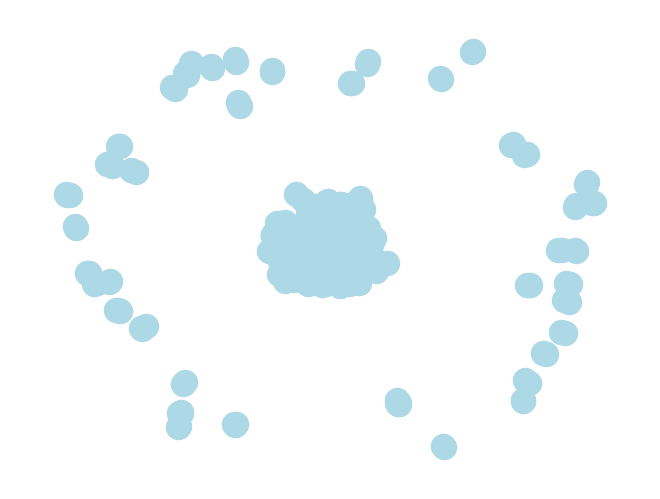

In [28]:
import matplotlib.pyplot as plt
# 绘制图
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray')
plt.savefig("network_graph_no.png")

In [31]:
import networkx as nx

# 假设 G1 和 G2 分别是您的两个网络图对象

# 计算中心性指标
def calculate_centralities(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    return degree_centrality, betweenness_centrality, closeness_centrality, eigenvector_centrality

def map_actors_name(top_actors):
    new_top = []
    for item in top_actors:
        (idx, score) = item
        new_top.append((idx, actor_list[int(idx)-1], score))
    return new_top

def top_actors(centrality, n=10):
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:n]

def analysis(G):
    centralities_ = calculate_centralities(G)
    # 打印前30名演员
    for i, centrality in enumerate(['Degree', 'Betweenness', 'Closeness', 'Eigenvector']):
        print(f"{centrality} Centrality Top Actors in G:")
        print(map_actors_name(top_actors(centralities_[i])))

analysis(G)


Degree Centrality Top Actors in G:
[('4016', '王宏', 0.07593220338983052), ('4455', '冯晖', 0.0752542372881356), ('3947', '沈保平', 0.06305084745762712), ('28', '王永泉', 0.059661016949152545), ('2639', '王凯', 0.05491525423728814), ('1515', '马波', 0.054237288135593226), ('154', '贺文潇', 0.05355932203389831), ('1929', '刘奕君', 0.05016949152542373), ('2349', '赵千紫', 0.0488135593220339), ('2815', '王劲松', 0.04813559322033899)]
Betweenness Centrality Top Actors in G:
[('3947', '沈保平', 0.09175259105379271), ('154', '贺文潇', 0.07596526109692732), ('1526', '徐敏', 0.04785339324015994), ('4016', '王宏', 0.042217420168618354), ('2815', '王劲松', 0.04213232459340982), ('1929', '刘奕君', 0.040455690582396064), ('3355', '方晓莉', 0.03652675466749125), ('5885', '李斌', 0.03575591646562997), ('5523', '徐佳琦', 0.034472594148997095), ('2940', '李建义', 0.03379907344519781)]
Closeness Centrality Top Actors in G:
[('4016', '王宏', 0.34030584200093544), ('3947', '沈保平', 0.33826116217700086), ('2815', '王劲松', 0.3380845244944019), ('1929', '刘奕君', 0.33

In [6]:
import sys

import re


In [7]:
def preprocess(filename):
    fin = open(filename, 'r')
    fout = open('NORM_' + filename, 'w')
    data = fin.read()
    titles = re.findall(r'《(.*?)》', data)
    print(len(set(titles)))
    print(set(titles))
    fin.close()
    fout.write('\n'.join(list(set(titles)))+'\n')
    fout.close()
    return set(titles)

In [8]:
jy_titles = preprocess("金鹰奖.csv")
byl_titles = preprocess("白玉兰奖.csv")
ft_titles = preprocess("飞天奖.csv")

total_titles = preprocess("三大奖获奖电视剧列表.csv")
    

76
{'绝密使命', '初心', '功勋', '母亲母亲', '花千骨', '我的土地我的家', '人世间', '陪你到世界之巅', '绝命后卫师', '麻雀', '平凡的世界', '老有所依', '百炼成钢', '外交风云', '咱们结婚吧', '春天里', '芈月传', '跨过鸭绿江', '春风十里不如你', '琅琊榜', '山海情', '北平无战事', '赵氏孤儿案', '知否知否应是绿肥红瘦', '白鹿原', '王大花的革命生涯', '聂荣臻', '马向阳下乡记', '大秦帝国之纵横', '原乡', '共产党人刘少奇', '旋风少女', '情满四合院', '叶问', '心术', '少帅', '妈祖', '海棠依旧', '父母爱情', '我们的法兰西岁月', '都挺好', '永生不忘', '大江大河', '历史转折中的邓小平', '红高粱', '澳门人家', '鸡毛飞上天', '漂亮的李慧珍', '于无声处', '长白山下我的家', '十送红军', '壮士出川', '装台', '精忠岳飞', '觉醒年代', '换了人间', '天下粮田', '那年花开月正圆', '毛泽东', '打狗棍', '舞乐传奇', '寻路', '辣妈正传', '对手', '花木兰传奇', '国家命运', '小欢喜', '陆军一号', '国家孩子', '热血军旗', '破冰行动', '破阵', '焦裕禄', '营盘镇警事', '长安十二时辰', '嘿，老头！'}
52
{'时代：卡列夫·布劳德的故事', '大军师司马懿之军师联盟', '功勋', '亲爱的小孩', '人世间', '好先生', '少年派', '芈月传', '琅琊榜', '山海情', '三十而已', '反叛的童谣', '大决战', '三体', '农夫/退伍军人', '开端', '白鹿原', '老酒馆', '古战场传奇', '小别离', '情满四合院', '爱情的边疆', '救赎之路', '少帅', '海棠依旧', '父母爱情', '庆余年', '都挺好', '领航', '大江大河', '于无声处', '流金岁月', '鸡毛飞上天', '彭德怀元帅', '装台', '正阳门下小女人', '觉醒年代', '山水间的家', '朗读者第一季', '开讲啦', '县委大院', '小欢喜', '我的前半生', '天盛长歌', '媳妇的美好

In [ ]:

url = "https://movie.douban.com/subject/2284418/"

# import time
# 爬取演员列表
def get_douban_drama_detail(id):
    
    # url = "https://movie.querydata.org/api"
    url = "https://movie.douban.com/j/subject_abstract"
    params = {
        "subject_id": id
    }
    headers = {
        # 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36',
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }
    response = requests.get(url, params = params, headers = headers)
    if response.status_code != 200:
        print("request failed")
        return {}
    drama = response.json().get("subject", {})
    return drama


tvid2actors = {}
tvid2detail = {}
unique_actors = set()
actor_fout = open('电视剧演员名单.csv', 'w')
for tag in tag_list:
    dramas_list = result[tag]
    for drama in dramas_list:
        # time.sleep(1)
        tv_id = drama[1]
        drama_detail = get_douban_drama_detail(tv_id)
        tvid2detail[tv_id] = drama_detail
        actors = drama_detail.get('actors', [])
        actors_str = ' '.join(actors)
        actor_fout.write(f'{tv_id},{actors_str}\n')
        tvid2actors[tv_id] = actors
        print(f'{tag}: {len(tvid2actors)}')
actor_fout.close()   
